# Training and Validation losses

In [28]:
# Reloads modules automatically before executing code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Imports
import os
import torch
from torch.utils.data import DataLoader as TorchDataLoader
from DL_vs_HateSpeech.loading_data.dataloader import DataLoader
from DL_vs_HateSpeech.training.training import collate_fn
from DL_vs_HateSpeech.plots.plot_loss import plot_losses_from_path
from DL_vs_HateSpeech.models.model_v0 import ModelV0
from DL_vs_HateSpeech.models import load_model_from_path
from DL_vs_HateSpeech.utils import get_label_str_list
import matplotlib.pyplot as plt
device = "cpu"


## Model v0

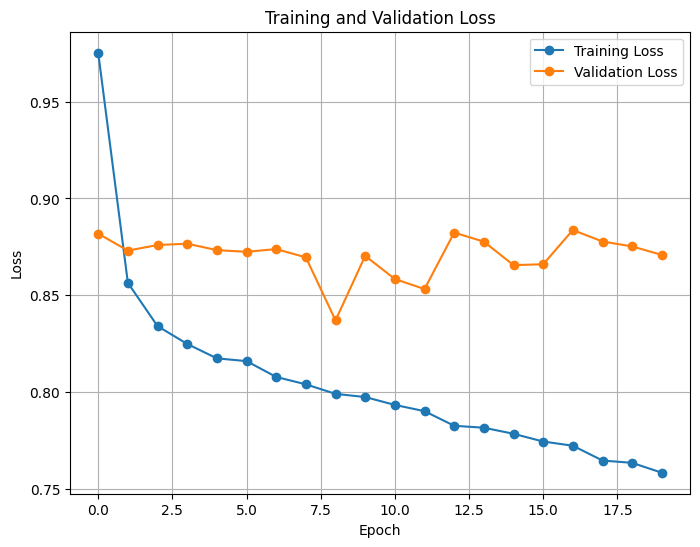

In [30]:
path = "./models/model_checkpoints/model_0"
# See the files in the path
plot_losses_from_path(path)

Prediction: ['not harmful']
True labels: ['not harmful']


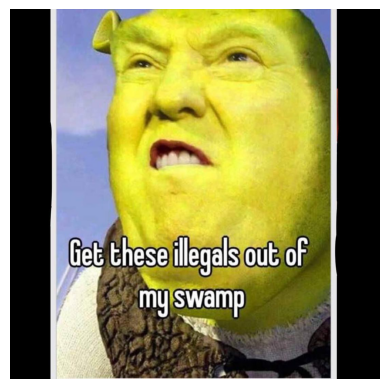

In [37]:
model = load_model_from_path(path, device=device)
model.eval()

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")
BATCH_SIZE = 1

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

for images, texts, labels in val_loader:
        probs = model(texts, images)
        # Compute predictions (get the class with the highest probability)
        print("Prediction:", get_label_str_list(torch.argmax(probs, dim=1)))
        print("True labels:", get_label_str_list(labels))
        plt.imshow(images[0])
        plt.axis('off')  # Hide the axes
        plt.show()
        break